In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
train = pd.read_csv('./datasets/cifar10_train.csv')
test = pd.read_csv('./datasets/cifar10_test.csv')

In [3]:
x_train = train.drop('label',axis=1).values
y_train = train['label'].values

x_test = test.drop('label',axis=1).values
y_test = test['label'].values

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((-1,32,32,3))
x_test = x_test.reshape((-1,32,32,3))

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,epochs=11,validation_data=(x_test,y_test))

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3568 - loss: 1.7503 - val_accuracy: 0.5779 - val_loss: 1.2011
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5872 - loss: 1.1739 - val_accuracy: 0.6156 - val_loss: 1.1011
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6439 - loss: 1.0194 - val_accuracy: 0.6390 - val_loss: 1.0511
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6858 - loss: 0.9100 - val_accuracy: 0.6580 - val_loss: 0.9780
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7089 - loss: 0.8236 - val_accuracy: 0.6748 - val_loss: 0.9403
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7375 - loss: 0.7544 - val_accuracy: 0.6870 - val_loss: 0.9370
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7557 - loss: 0.6987 - val_accuracy: 0.7050 - val_loss: 0.8632
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7825 - loss: 0.6254 - 

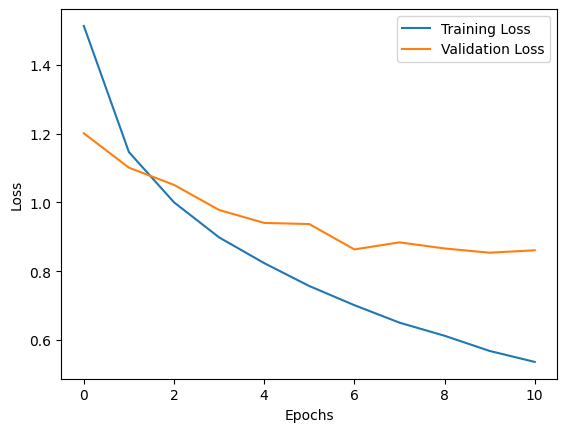

In [8]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

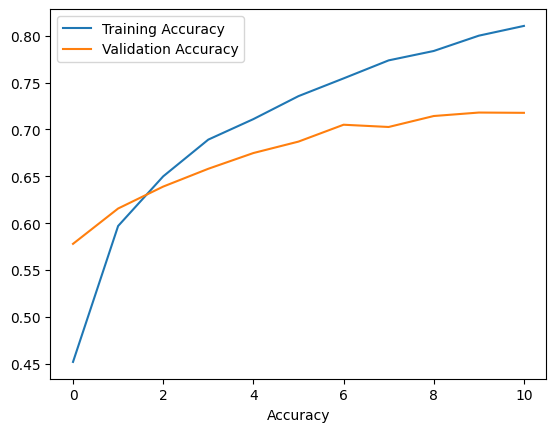

In [9]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7197 - loss: 0.8521


In [11]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


actual :  truck
predicted :  truck


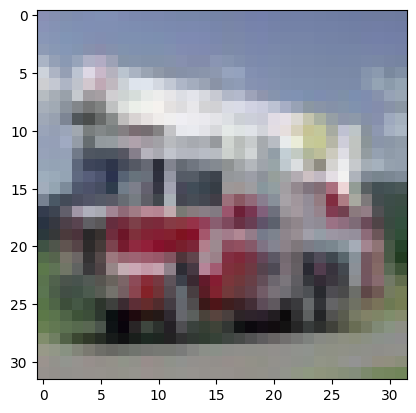

In [12]:
n = 89
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(x_test[n].reshape(32,32,3))
print('actual : ', classes[y_test[n]])
print('predicted : ', classes[np.argmax(y_pred[n])])